In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zip_ref = ZipFile("/content/drive/MyDrive/archive (2).zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
!ls "/tmp"

__autograph_generated_filejfa800cv.py
__autograph_generated_filemssomx5b.py
__autograph_generated_filergswiqvm.py
dap_multiplexer.6a4b30373d9d.root.log.INFO.20220518-182339.60
dap_multiplexer.INFO
debugger_kpgwkqpub
directoryprefetcher_binary.6a4b30373d9d.root.log.INFO.20220518-182449.291
directoryprefetcher_binary.INFO
drivefs_ipc.0
drivefs_ipc.0_shell
flickr30k_images
initgoogle_syslog_dir.0
__pycache__
pyright-113-E7GAx3F5Ld5u
pyright-113-xCFrwIQKRpcS
pyright-159984-6WzF3EREY9KA
pyright-159984-TRs5sebYe658
pyright-160267-adXEELRfrII4
pyright-160267-CulOj4oZAibq
pyright-160311-Ul15j9tkai7T
pyright-160311-ZiS0BaCAyh22
python-languageserver-cancellation


In [ ]:
!ls "/tmp/flickr30k_images"


flickr30k_images  results.csv


In [ ]:
import pandas as pd
pd.set_option("max_colwidth",-1)
data=pd.read_csv("/tmp/flickr30k_images/results.csv",header=None, sep='\n')
#data.drop(data.index[0])
data.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,0
0,image_name| comment_number| comment
1,1000092795.jpg| 0| Two young guys with shaggy hair look at their hands while hanging out in the yard .
2,"1000092795.jpg| 1| Two young , White males are outside near many bushes ."
3,1000092795.jpg| 2| Two men in green shirts are standing in a yard .
4,1000092795.jpg| 3| A man in a blue shirt standing in a garden .
5,1000092795.jpg| 4| Two friends enjoy time spent together .
6,10002456.jpg| 0| Several men in hard hats are operating a giant pulley system .
7,10002456.jpg| 1| Workers look down from up above on a piece of equipment .
8,10002456.jpg| 2| Two men working on a machine wearing hard hats .
9,10002456.jpg| 3| Four men on top of a tall structure .


In [ ]:
def get_img_str(val):
  val=str(val).split("|")
  val1=val[0].split(" ")
  return val1[-1]

def get_capt(val):
  val=str(val).split("|")
  val=val[-1].split('\n')
  val =val[0].split('.')
  return val[0]  

In [ ]:
def img_capt(data):
  descriptions={}
  j=0
  for index, row in data.iterrows():
    if index%5==1:
      j=0
      val=get_img_str(row)
      descriptions[get_img_str(row)]=[get_capt(row)]
    else:  
      descriptions[val].append(get_capt(row))
      j+=1
  return descriptions

In [ ]:
descriptions=img_capt(data.iloc[1:])

In [ ]:
len(descriptions)

31783

In [ ]:
import string
def txt_clean(captions):
   table = str.maketrans('','',string.punctuation)
   for img,caps in captions.items():
     for i,img_caption in enumerate(caps):
        img_caption.replace("-"," ")
        descp = img_caption.split()
        #uppercase to lowercase
        descp = [wrd.lower() for wrd in descp]
        #remove punctuation from each token
        descp = [wrd.translate(table) for wrd in descp]
        #remove hanging 's and a
        descp = [wrd for wrd in descp if(len(wrd)>1)]
        #remove words containing numbers with them
        descp = [wrd for wrd in descp if(wrd.isalpha())]
        #converting back to string
        img_caption = ' '.join(descp)
        captions[img][i]= img_caption
   return captions
def txt_vocab(descriptions):
  # To build vocab of all unique words
  vocab = set()
  for key in descriptions.keys():
    [vocab.update(d.split()) for d in descriptions[key]]
  return vocab
clean_descriptions = txt_clean(descriptions)
#to build vocabulary
vocabulary = txt_vocab(clean_descriptions)

In [ ]:
import os 
def save_descriptions(descriptions, filename):
   lines = list()
   for key, desc_list in descriptions.items():
      for desc in desc_list:
         lines.append(key + '\t' + desc )
   data = "\n".join(lines)
   file = open(filename,"w")
   file.write(data)
   file.close()

save_descriptions(clean_descriptions, "descriptions.txt")

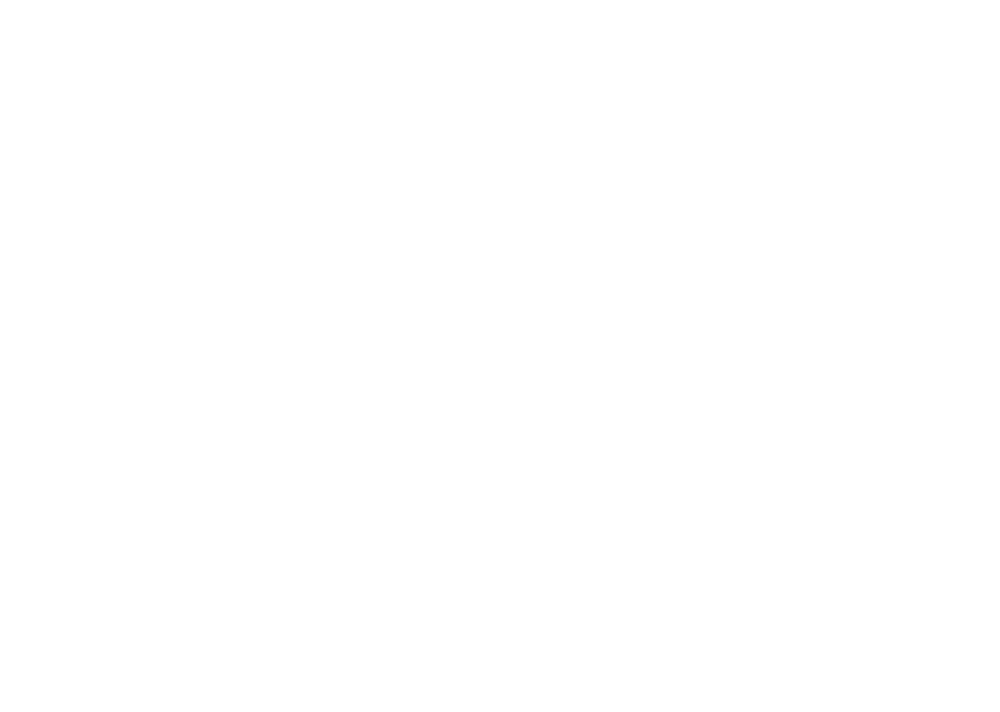

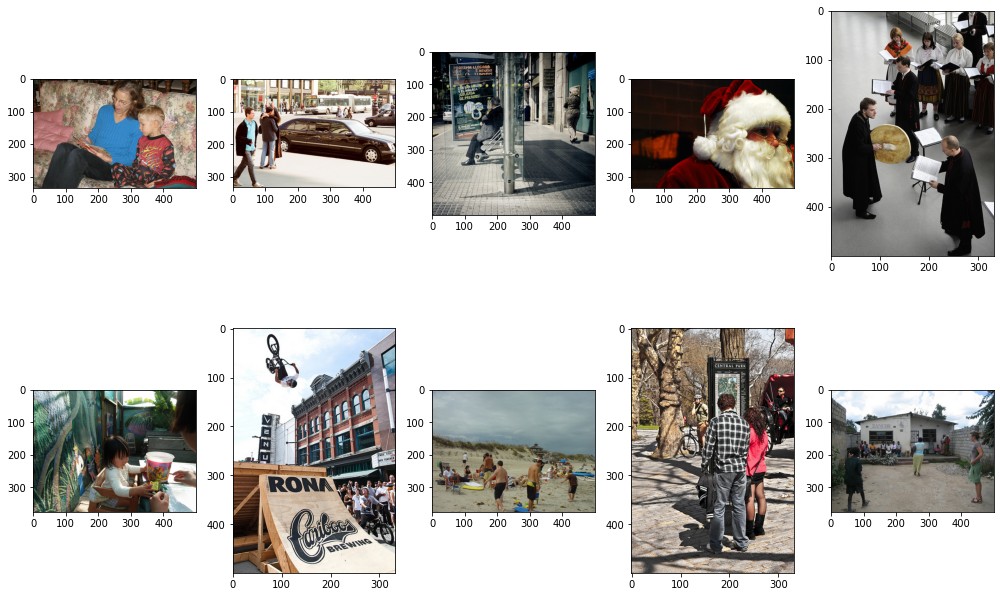

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
path_img="/tmp/flickr30k_images/flickr30k_images/flickr30k_images"

plt.rcParams["figure.figsize"] = [14,10]
plt.rcParams["figure.autolayout"] = True

images = os.listdir(path_img)[1000:1010]
images=[path_img+"/"+img for img in images]
plt.axis('off')
k=0
fig,ax=plt.subplots(2,5)
for i in range(2):
  for j in range(5):
    im=plt.imread(images[k])
    ax[i,j].imshow(im)
    k+=1
plt.show()    

In [ ]:
import shutil
import numpy as np
import os
shutil.rmtree("/train_images")
shutil.rmtree("/test_images")
shutil.rmtree("/all_images")
os.mkdir("/train_images")
os.mkdir("/test_images")
os.mkdir("/all_images")
photos_train=[]
photos_test=[]
shuffled_indices = np.random.permutation(len(os.listdir(path_img)))
train_set_size = int(len(os.listdir(path_img)) * 0.85)
test_set_size = int(len(os.listdir(path_img)) * 0.15)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:(train_set_size+test_set_size)]
for i,file in enumerate(os.listdir(path_img)):
  if i in train_indices:
    photos_train.append(file)
    shutil.copy(path_img+'/'+file,"/train_images")
  elif i in test_indices:  
    photos_test.append(file)
    shutil.copy(path_img+'/'+file,"/test_images")

for i,file in enumerate(os.listdir("/train_images")):    
  shutil.copy("/train_images"+'/'+file,"/all_images")
for i,file in enumerate(os.listdir("/test_images")): 
  shutil.copy("/test_images"+'/'+file,"/all_images")  

In [ ]:
clean_descriptions["3116011063.jpg"]


['surfer in black wetsuit falling off his board into the water',
 'man falling off of surfboard in the ocean',
 'surfer is falling into big ocean wave',
 'surfer flies over crashing wave',
 'the surfer is wiped out by the wave']

In [ ]:
 os.listdir(path_img)[1000:1010]

['2222732183.jpg',
 '3456488632.jpg',
 '4525077213.jpg',
 '4193782937.jpg',
 '3483392163.jpg',
 '3458125058.jpg',
 '6044445148.jpg',
 '1602852890.jpg',
 '4511377649.jpg',
 '2572609425.jpg']

In [ ]:
from keras.applications.xception import Xception

In [ ]:
from pickle import load,dump
import joblib
from tqdm import tqdm_notebook as tqdm
import numpy as np
from PIL import Image
def extract_features(directory):
  model = Xception( include_top=False, pooling='avg' )
  features = {}
  for pic in tqdm(os.listdir(directory)):
    file = directory + "/" + pic
    image = Image.open(file)
    image = image.resize((299,299))
    image = np.expand_dims(image, axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    features[pic] = feature
  return features
features = extract_features("/all_images")

83697664/83683744 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/31782 [00:00<?, ?it/s]

In [ ]:

joblib.dump(features, "/content/features.gz")
#to directly load the features from the pickle file.
features = joblib.load("/content/features.gz")

In [ ]:
ls "/content"

descriptions.txt  drive/  features.gz  sample_data/


In [ ]:
path_img="/tmp/flickr30k_images/flickr30k_images"
#!ls "/tmp/flickr30k_images/flickr30k_images/flickr30k_images"
len(os.listdir("/tmp/flickr30k_images/flickr30k_images/flickr30k_images"))

31783

In [ ]:
import joblib
model=joblib.load('/content/my_model2 (1).sav')

In [ ]:
shutil.rmtree("/tmp/flickr30k_images/")

In [ ]:
import os
def load_fp(filename):
  # Open file to read
   file = open(filename, 'r')
   text = file.read()
   file.close()
   return text
def load_clean_descriptions(filename, photos):
  #loading clean_descriptions
  file = load_fp(filename)
  descriptions = {}
  for line in file.split("\n"):
    words = line.split()
    if len(words)<1 :
      continue
    image, image_caption = words[0], words[1:]
    if image in photos:
      if image not in descriptions:
        descriptions[image] = []
      desc = 'startseq ' + " ".join(image_caption) + ' endseq'
      descriptions[image].append(desc)
  return descriptions
def load_features(photos):
  #loading all features
   all_features = joblib.load("/content/features.gz")
  #selecting only needed features
   features = {k:all_features[k] for k in photos}
   return features
#train = loading_data(filename)

train_descriptions = load_clean_descriptions("descriptions.txt",photos_train)
train_features = load_features(photos_train)

In [ ]:
print(train_descriptions['1000366164.jpg'])

['startseq two men one in gray shirt one in black shirt standing near stove endseq', 'startseq two guy cooking and joking around with the camera endseq', 'startseq two men in kitchen cooking food on stove endseq', 'startseq two men are at the stove preparing food endseq', 'startseq two men are cooking meal endseq']


In [ ]:
print(len(train_descriptions))
print(len(train_features))

27015
27015


In [ ]:
from gensim.models.wrappers import FastText

ft = FastText.load_fasttext_format('wiki.simple')

In [ ]:
!pip install fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

     |████████████████████████████████| 68 kB 3.7 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3147827 sha256=903cbf9d98afc32520be1e12cadd266ffe25358f2622e85a6af707811f239906
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext



In [ ]:
shutil.rmtree("/tmp/flickr30k_images/flickr30k_images")

In [ ]:
from keras.preprocessing.text import Tokenizer
import numpy as np

def dict_to_list(descriptions):
  all_desc = []
  for key in descriptions.keys():
    [all_desc.append(d) for d in descriptions[key]]
  return all_desc

def create_tokenizer(descriptions):
   desc_list = dict_to_list(descriptions)
   tokenizer = Tokenizer()
   tokenizer.fit_on_texts(desc_list)
   return tokenizer  

tokenizer = create_tokenizer(train_descriptions)
joblib.dump(tokenizer,'/content/tokenizer.gz')
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = ft.get_word_vector(word)
    embedding_matrix[i] = embedding_vector
def max_length(descriptions):
  desc_list = dict_to_list(descriptions)
  return max(len(d.split()) for d in desc_list)
max_length = max_length(descriptions)
#print(max_length) 

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
#features = load(open("features.p","rb"))
def create_sequences(tokenizer, max_length, desc_list, feature):
    x_1, x_2, y = list(), list(), list()
  # move through each description for the image
    for desc in desc_list:
    # encode the sequence
      seq = tokenizer.texts_to_sequences([desc])[0]
      # divide one sequence into various X,y pairs
      for i in range(1, len(seq)):
        # divide into input and output pair
        in_seq, out_seq = seq[:i], seq[i]
        # pad input sequence
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        # encode output sequence
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        x_1.append(feature)
        x_2.append(in_seq)
        y.append(out_seq)
    return np.array(x_1), np.array(x_2), np.array(y)

def data_generator(descriptions, features, tokenizer, max_length):
  while 1:
    for key, description_list in descriptions.items():
      #retrieve photo features
      feature = features[key][0]
      inp_image, inp_seq, op_word = create_sequences(tokenizer, max_length, description_list, feature)
      yield [[inp_image, inp_seq], op_word]


[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape      

((52, 2048), (52, 72), (52, 18439))

In [ ]:
from google.colab import files
files.download('tokenizer.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import LSTM,GaussianNoise,Dense,Embedding,Dropout,Input,Reshape
def define_model(vocab_size,max_length):
    inputs1 = Input(shape=(2048,))
    fe1=GaussianNoise(0.01)(inputs1)
    fe2 = Dense(512 , activation='relu')(fe1)
    fe3 = Dropout(0.3)(fe2)
    fe4=Reshape((1,512))(fe3)
    fe5 = LSTM(300)(fe4)
    
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size,300,weights=[embedding_matrix],trainable=False )(inputs2) 
    se2 = Dropout(0.3)(se1)
    se3 = LSTM(300)(se2)
    
    
    #decoder Model
    decoder1 = add([fe5 , se3])
    decoder2 = Dense(300 ,activation='relu')(decoder1)
    outputs = Dense(vocab_size , activation='softmax')(decoder2)
    model = Model([inputs1 , inputs2] , outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
  # summarize model
    print(model.summary())
    plot_model(model, to_file='/content/model.png', show_shapes=True)
    return model


In [ ]:

model=define_model(vocab_size,max_length)
!mkdir "/content/models"
epochs=10
steps=len(train_descriptions)
for i in range(epochs):
  generator=data_generator(train_descriptions, train_features, tokenizer, max_length)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
  model_filename1="/content/models/my_model"+str(i)+".h5"
  model.save(model_filename1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 2048)        0           ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 512)          1049088     ['gaussian_noise[0][0]']         
                                                                                                  
 input_3 (InputLayer)           [(None, 72)]         0           []                               
                                                                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


27015/27015 [==============================] - 466s 17ms/step - loss: 5.1374


In [ ]:
my_model1 = joblib.load("/content/models/my_model7.h5")
#my_model2 = pickle.load(open("/content/my_model4.sav",'rb'))

In [ ]:
import argparse
from PIL import Image
import numpy
from keras.preprocessing.sequence import pad_sequences
ap=argparse.ArgumentParser()
#ap.add_argument('-i','--image',required=True,help="Image Path")
#args=vars(ap.parse_args())
#path_img=args["image"]
def extract_features(filename,model):
  try:
    image=Image.open(filename)
  except:
    print("Error!!! Cannot Open Image ,Verify the Path given or the Image extension")
  image = image.resize((299,299))
  image = np.expand_dims(image, axis=0)
  image = image/127.5
  image = image - 1.0
  feature=model.predict(image)
  return feature


def word_for_id(integer,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index==integer:
      return word   
  return None
def generate_desc(model,tokenizer,photo,max_length):
   in_text="startseq"
   for i in range(max_length):
     sequence=tokenizer.texts_to_sequences([in_text])[0]
     sequence=pad_sequences([sequence],maxlen=max_length)
     pred=model.predict([photo,sequence],verbose=0)
     pred=np.argmax(pred)
     word=word_for_id(pred,tokenizer)    
     if word is None:
       break 
     in_text+=' '+word  
     if word == "endseq":
       break
    

   return in_text
      

In [ ]:
import joblib
tokenizer=joblib.load("/content/tokenizer.gz","rb")
model=load_model("/content/models/my_model7.h5")
xception_mod=Xception(include_top=False,pooling='avg')


/usr/lib/python3.7/contextlib.py:112: UserWarning: mmap_mode "rb" is not compatible with compressed file /content/tokenizer.gz. "rb" flag will be ignored.
  return next(self.gen)


In [ ]:
descriptions["1250845715.jpg"] 

['two women sitting under tent one with shirt redhair dark clothes drinking and the other laying down playing the guitar in green top and jean peddle pushers both barefoot',
 'people sit barefoot in tent one with beer and one lounging playing guitar',
 'two young women drink beer and play guitar in tent at outdoor event',
 'people in tent listening to one playing guitar',
 'two girls at peace during music festival']

In [ ]:
import os
path_img="/test_images/"+os.listdir("/test_images")[45]
print(path_img)
photo=extract_features(path_img,xception_mod)
description=generate_desc(model,tokenizer,photo,max_length=72)
print("\n\n")
print(description)

/test_images/3532598048.jpg



startseq man in black shirt is playing guitar endseq


In [ ]:
np.max(photo)

1.0

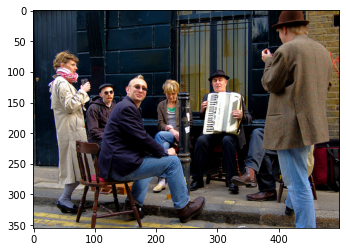

In [ ]:
import matplotlib.pyplot as plt
img=Image.open(path_img)
plt.imshow(img)
plt.show()

In [ ]:
def load_clean_descriptions(filename, photos):
  #loading clean_descriptions
  file = load_fp(filename)
  descriptions = {}
  for line in file.split("\n"):
    words = line.split()
    if len(words)<1 :
      continue
    image, image_caption = words[0], words[1:]
    if image in photos:
      if image not in descriptions:
        descriptions[image] = []
      desc = 'startseq ' + " ".join(image_caption) + ' endseq'
      descriptions[image].append(desc)
  return descriptions

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
def evaluate_model(model , desciptions , photos , tokenizer , max_length):
    actual , predicted = list() , list()
    
    for key , desc_list in desciptions.items():
        generated_desc = generate_desc(model , tokenizer , extract_features("/test_images/"+str(key),xception_mod) , max_length)
        
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(generated_desc.split())
    
    print('Bleu_Score -1 = %f'%corpus_bleu(actual , predicted , weights=(1,0,0,0)))
    
    print('Bleu_Score -2 = %f'%corpus_bleu(actual , predicted , weights=(0.5,0.5,0,0)))
    
    print('Bleu_Score -3 = %f'%corpus_bleu(actual , predicted , weights=(0.33,0.33,0.33,0))) 
    
    print('Bleu_Score -4 = %f'%corpus_bleu(actual , predicted , weights=(0.25,0.25,0.25,0.25)))

In [ ]:
test_descriptions = load_clean_descriptions("descriptions.txt",photos_test)
evaluate_model(model , test_descriptions , photos_test , tokenizer , max_length=72)

Bleu_Score -1 = 0.557592
Bleu_Score -2 = 0.304590
Bleu_Score -3 = 0.182252
Bleu_Score -4 = 0.101386
